In [2]:
from datasets import load_from_disk

In [2]:
dataset = load_from_disk("../converted")
train_dataset = dataset['train']
eval_dataset = dataset['test']

/home/peryaudo/mambaforge/envs/peryagpt/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [3]:
from sentence_transformers import SentenceTransformer, util
sentences = ["I'm happy", "I'm full of happiness"]

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

#Compute embedding for both lists
embedding_1 = model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

util.pytorch_cos_sim(embedding_1, embedding_2)

tensor([[0.8495]], device='cuda:0')

In [4]:
sentences = ["I'm happy", "I'm so sad"]
embedding_1 = model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

util.pytorch_cos_sim(embedding_1, embedding_2)

tensor([[0.3567]], device='cuda:0')

In [ ]:
sentences = ["I'm happy", "I'm so sad"]
embedding_1 = model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

util.pytorch_cos_sim(embedding_1, embedding_2)

In [11]:
examples = []

for example in train_dataset.select(range(1000)):
    topic_embedding = model.encode(example['topic'], convert_to_tensor=True)
    comment_embedding = model.encode(example['comment'], convert_to_tensor=True)
    
    sim = float(util.pytorch_cos_sim(topic_embedding, comment_embedding).to('cpu'))
    examples.append({"topic": example["topic"], "comment": example["comment"], "score": sim})

In [17]:
model?

Signature:      model(*args, **kwargs)
Type:           SentenceTransformer
String form:   
SentenceTransformer(
           (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Tra <...> n_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
           )
Length:         2
File:           ~/mambaforge/envs/peryagpt/lib/python3.11/site-packages/sentence_transformers/SentenceTransformer.py
Docstring:     
Loads or create a SentenceTransformer model, that can be used to map sentences / text to embeddings.

:param model_name_or_path: If it is a filepath on disc, it loads the model from that path. If it is not a path, it first tries to download a pre-trained SentenceTransformer model. If that fails, tries to construct a model from Huggingface models repository with that name.
:param modules: This parameter can be used to create custom SentenceTransformer models from scratch.
:param device: Device (like 'cuda' / 'cpu') that should be u

In [1]:
from datasets import load_from_disk
dataset = load_from_disk("../converted_with_score")
train_dataset = dataset['train']
eval_dataset = dataset['test']

/home/peryaudo/mambaforge/envs/peryagpt/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

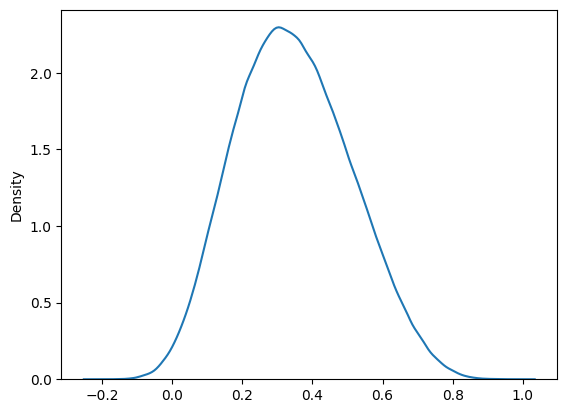

In [20]:
sns.kdeplot(train_dataset['similarity'])
plt.show()

In [21]:
np.percentile(train_dataset['similarity'], 50)

0.33787837624549866

In [24]:
np.percentile(train_dataset['similarity'], 95)

0.6287663161754606

In [3]:
for example in train_dataset.sort('similarity', reverse=True).select(range(100)):
    # if ">" in example["comment"]:
    print("(", example['similarity'], ") ", example['topic'], " -> ",example['comment'])

( 0.6124897599220276 )  【海外】なぜ「ぴったりＴシャツ」だけ？　女児の服にもっと選択肢を  ->  女児が男物着たっていいじゃん…
むしろ余計カッコ良く見えるわ…
( 0.6124897003173828 )  【社会】「専門職大学」１９年開学へ　改正学校教育法が成立…IT分野などで即戦力育成  ->  マーチレベルの大学って、あと２０年もしたら『馬鹿でも合格できる大学』にまで落ちぶれるんだよな
少子化のせいでお前らの母校も馬鹿大学になっちまうという
( 0.6124886274337769 )  【豊洲問題】豊洲問題 専門家会議「無害化」めぐり議論かみ合わず　築地業者ら怒りで打ち切り  ->  築地の汚染は妥協しまくってるくせにｗ
( 0.6124879121780396 )  【経済】大阪からの本社移転、508社　東京・兵庫に集中　流出続く　94-14年度  ->  やっぱ大阪ってクソだわ
( 0.6124874353408813 )  【宇宙】NASA、１００京円の価値のある小惑星「プシケ」を地球に持ち帰る計画を実行へ  ->  Ai搭載ロボットを送り込み、小惑星上で移動用プラントを建設。材料は現地調達。スイングバイを利用しつつ、地球の衛星軌道に。物資の輸送はリニアエレベーター？
( 0.6124863624572754 )  【社会】男性同士でのラブホ断られ「あ、差別されたんだ」　大阪府のゲイのカップルが訴え  ->  本当の差別を受けている人たちに失礼
( 0.6124832630157471 )  【国連】国連事務総長　国連特別報告者のテロ等準備罪法案批判について「国連の総意ではない」　安倍首相との会談で   ->  だからおまえは中学生からやりなおせ。特定の意見といってるが「国連の」という意味で特定されてんだよ。
世界中の意見でなく、国連の意見という意味だ阿呆
( 0.6124798655509949 )  【家庭】「夫はやっていない家の仕事がたくさん！」夫が家事と思っていない『名もなき家事』が存在。やっているのは9割が妻  ->  仕事忙しくて夜家で食べないから嫁絶対楽だわ
( 0.6124790906906128 )  【中国6邦人拘束】「精神状態が心配だ」　社員が拘束の日本地下探査が会見  ->  未だに中国企業からの調査